# ACL-Style Figure Configuration Guide

**This notebook generates publication-ready figures following ACL (Association for Computational Linguistics) formatting standards.**

## Design Principles

✓ **Vector format (PDF)** - All figures export as PDFs with embedded fonts  
✓ **Color-blind safe palette** - Wong 2011 palette works in grayscale  
✓ **Clean, minimal design** - No chart junk, clear data-to-ink ratio  
✓ **Readable at print size** - Optimized for two-column A4 layout  
✓ **Consistent typography** - Sans-serif fonts, appropriate sizing  
✓ **Accessible** - Combines color with line styles/markers for clarity

## Color Palette (Color-blind Safe)

The notebook uses the Okabe & Ito / Wong 2011 color-blind safe palette:
- Blue: `#0173B2`
- Orange: `#DE8F05`  
- Green: `#029E73`
- Purple: `#CC78BC`
- Yellow: `#ECA400`
- Sky Blue: `#56B4E9`
- Red: `#CA3542`
- Gray: `#949494`

## Export Settings

- **Format**: PDF (vector)
- **DPI**: 300 (high-resolution for print)
- **Font type**: TrueType (embedded)
- **Figure size**: 7×4 inches (single-column width)

All figures are saved to `Ranking_Results/` directory.


# Análisis Comparativo de Modelos LLM
## Evaluación de Comprensión de Modismos Colombianos

Este notebook presenta visualizaciones para comparar el desempeño de diferentes modelos LLM en la comprensión de modismos colombianos usando múltiples métricas:

- **BERTScore (BETO & SciBETO)**: Similitud semántica con embeddings contextuales
- **Sentence-BERT**: Similitud basada en embeddings de oraciones
- **chrF**: Similitud a nivel de caracteres (n-gramas)

In [12]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# ACL-STYLE FIGURE CONFIGURATION
# ============================================================================
# Publication-ready settings for ACL conference proceedings
# Designed for two-column A4 format with color-blind safe palette

# Reset to defaults first
plt.rcdefaults()

# Figure size: optimized for single column width (~3.3 inches in ACL two-column)
# Scale up for better visibility, but keep aspect ratio reasonable
plt.rcParams['figure.figsize'] = (7, 4)  # Moderate size for readability
plt.rcParams['figure.dpi'] = 100  # Screen display
plt.rcParams['savefig.dpi'] = 300  # High-res for print
plt.rcParams['savefig.format'] = 'pdf'  # Vector format
plt.rcParams['pdf.fonttype'] = 42  # Ensure fonts are embedded (TrueType)
plt.rcParams['ps.fonttype'] = 42

# Font: Clean sans-serif, similar to Computer Modern Sans
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Arial', 'Helvetica']
plt.rcParams['font.size'] = 9  # Base font size for print legibility
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.title_fontsize'] = 9

# Lines and markers: thick enough for print
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 6
plt.rcParams['patch.linewidth'] = 1.0
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['grid.linewidth'] = 0.5

# Grid: minimal, subtle
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.axisbelow'] = True  # Grid behind data

# Spines: clean look
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Legend: clean, non-intrusive
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['legend.edgecolor'] = '0.8'
plt.rcParams['legend.fancybox'] = False

# Color-blind safe palette (Wong 2011, Okabe & Ito)
# Works in grayscale and for most types of color blindness
ACL_COLORS = {
    'blue': '#0173B2',      # Blue
    'orange': '#DE8F05',    # Orange  
    'green': '#029E73',     # Green
    'yellow': '#ECA400',    # Yellow
    'purple': '#CC78BC',    # Purple
    'cyan': '#56B4E9',      # Sky Blue
    'red': '#CA3542',       # Red
    'gray': '#949494'       # Gray
}

# Default color cycle (color-blind safe)
ACL_COLOR_CYCLE = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC', 
                   '#ECA400', '#56B4E9', '#CA3542', '#949494']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=ACL_COLOR_CYCLE)

# Tight layout by default
plt.rcParams['figure.autolayout'] = False  # We'll use tight_layout explicitly
plt.rcParams['figure.constrained_layout.use'] = False

# Directorio de resultados
RESULTS_DIR = Path('Metrics_Results')
RANKING_OUTPUT_DIR = Path('Ranking_Results')
RANKING_OUTPUT_DIR.mkdir(exist_ok=True)

print("✓ ACL-style configuration loaded")
print(f"  - Color-blind safe palette: {len(ACL_COLOR_CYCLE)} colors")
print(f"  - Export format: PDF (vector)")
print(f"  - Print DPI: {plt.rcParams['savefig.dpi']}")


✓ ACL-style configuration loaded
  - Color-blind safe palette: 8 colors
  - Export format: PDF (vector)
  - Print DPI: 300.0


## Carga de Datos

Cargamos todos los resultados de las métricas y los consolidamos en DataFrames para análisis.

In [13]:
def load_json_results(filename):
    """Carga un archivo JSON de resultados"""
    filepath = RESULTS_DIR / filename
    with open(filepath, 'r', encoding='utf-8') as f:
        return json.load(f)

# PROMPT 1: ¿Es Modismo?
p1_accuracy = pd.DataFrame(load_json_results('prompt_1_accuracy_resultados.json'))

# Cargar todos los resultados
# PROMPT 2: Modismo → Definición
p2_beto = pd.DataFrame(load_json_results('prompt_2_beto_bertscore_resultados.json'))
p2_scibeto = pd.DataFrame(load_json_results('prompt_2_scibeto_bertscore_resultados.json'))
p2_sbert = pd.DataFrame(load_json_results('prompt_2_paraphrase-mpnet_sbert_similarity_resultados.json'))
p2_xlm_roberta = pd.DataFrame(load_json_results('prompt_2_xlm-roberta_sbert_similarity_resultados.json'))
p2_scibeto_mean = pd.DataFrame(load_json_results('prompt_2_scibeto-mean_sbert_similarity_resultados.json'))
p2_chrf = pd.DataFrame(load_json_results('prompt_2_chrf_resultados.json'))

# PROMPT 3: Modismo + Ejemplo → Literal + Definición
p3_beto = pd.DataFrame(load_json_results('prompt_3_beto_bertscore_resultados.json'))
p3_scibeto = pd.DataFrame(load_json_results('prompt_3_scibeto_bertscore_resultados.json'))
p3_sbert = pd.DataFrame(load_json_results('prompt_3_paraphrase-mpnet_sbert_similarity_resultados.json'))
p3_xlm_roberta = pd.DataFrame(load_json_results('prompt_3_xlm-roberta_sbert_similarity_resultados.json'))
p3_scibeto_mean = pd.DataFrame(load_json_results('prompt_3_scibeto-mean_sbert_similarity_resultados.json'))
p3_chrf = pd.DataFrame(load_json_results('prompt_3_chrf_resultados.json'))

## Visualización 1: Desempeño por Métrica Individual

Gráficas separadas para cada métrica, ordenadas del mejor al peor modelo.

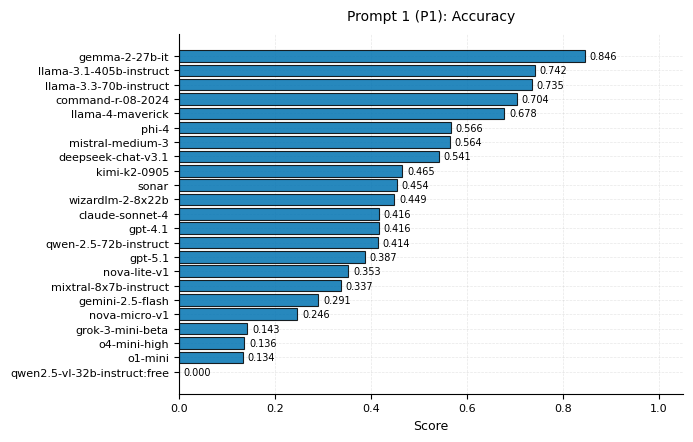

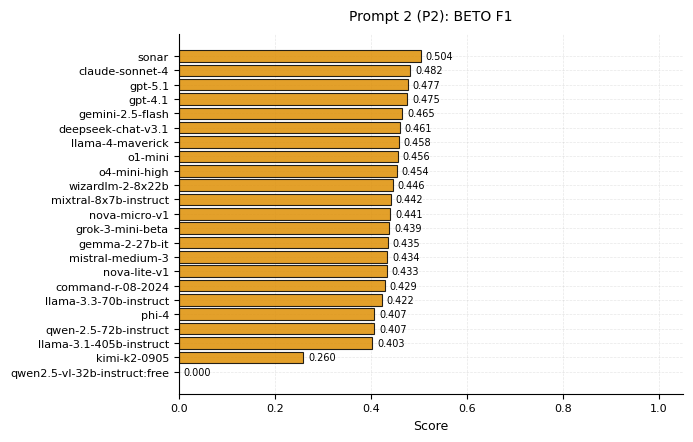

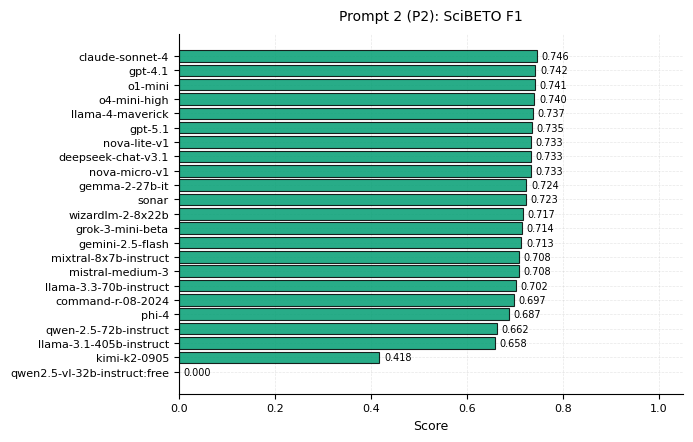

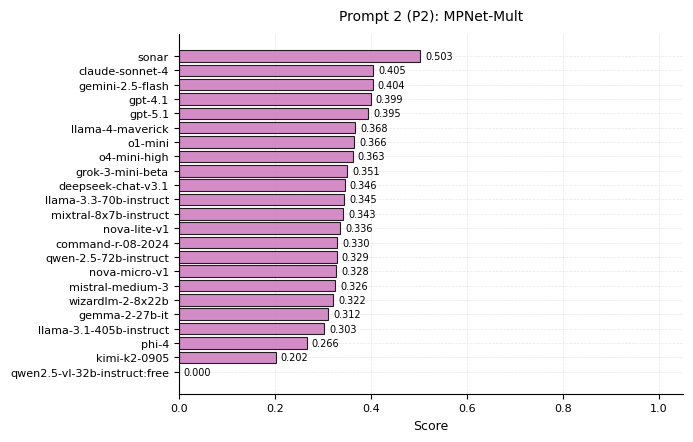

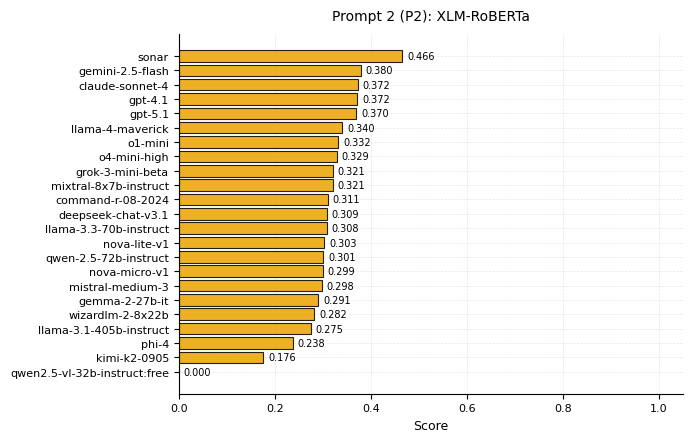

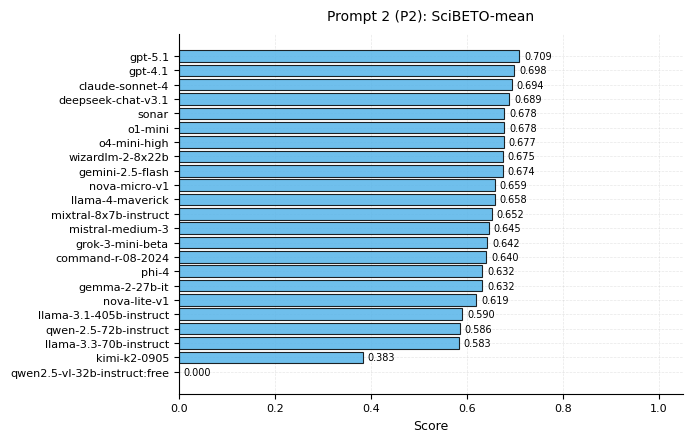

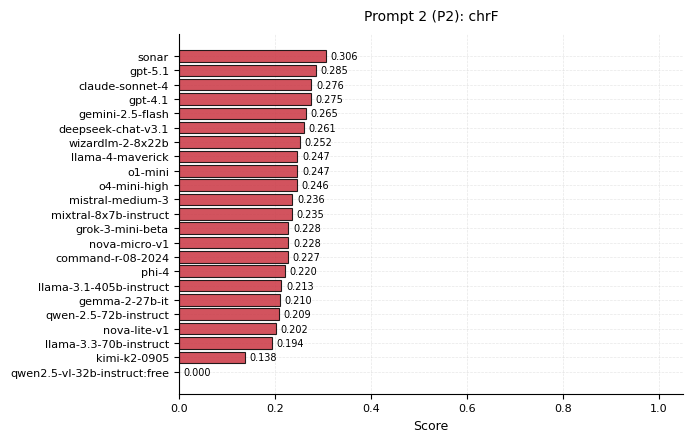

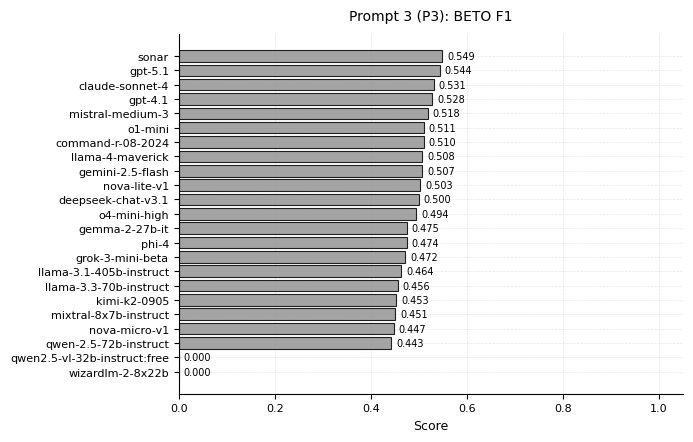

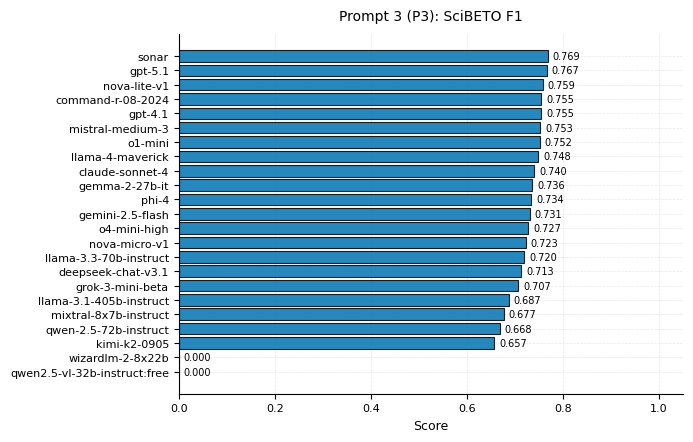

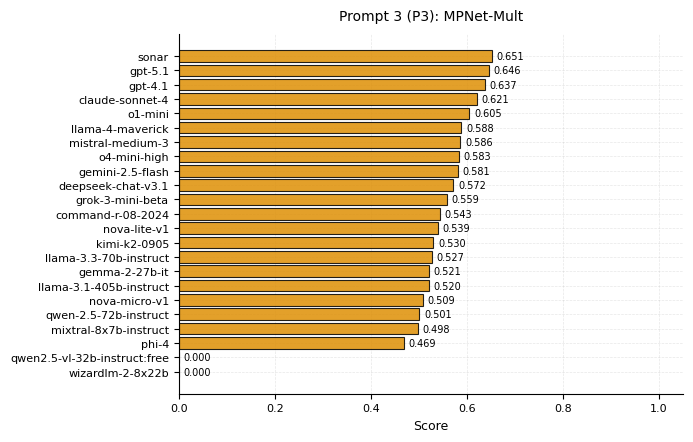

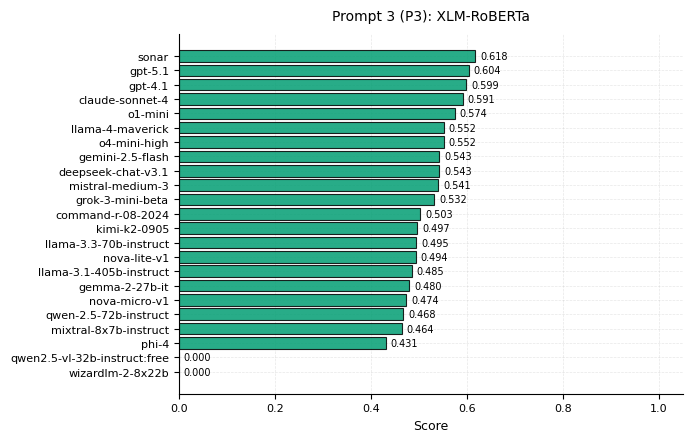

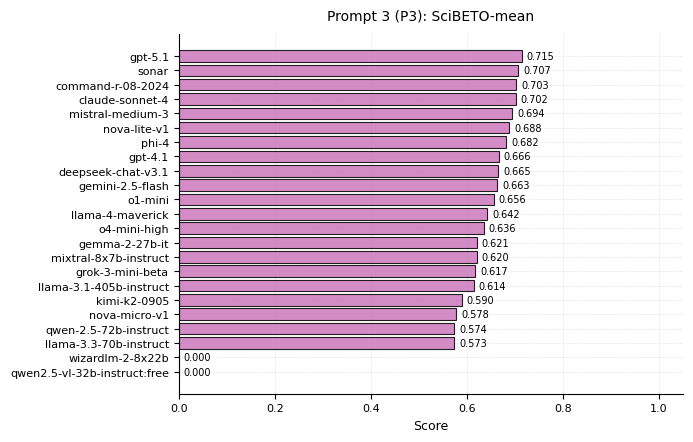

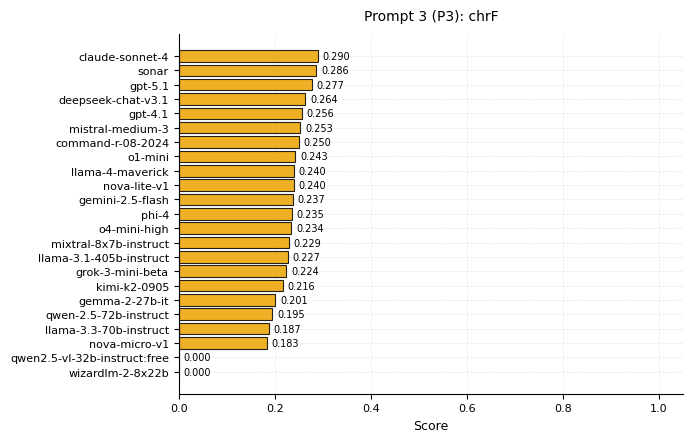

✓ Saved 13 metric plots to Ranking_Results


In [14]:
# Consolidar métricas promedio por modelo
metrics_data = {}

for modelo in p1_accuracy['modelo'].unique():
    modelo_short = modelo.split('/')[-1]
    
    metrics_data[modelo_short] = {
        'Prompt 1 (P1): Accuracy': p1_accuracy[p1_accuracy['modelo'] == modelo]['correcto'].mean(),
        'Prompt 2 (P2): BETO F1': p2_beto[p2_beto['modelo'] == modelo]['f1_score'].mean(),
        'Prompt 2 (P2): SciBETO F1': p2_scibeto[p2_scibeto['modelo'] == modelo]['f1_score'].mean(),
        'Prompt 2 (P2): MPNet-Mult': p2_sbert[p2_sbert['modelo'] == modelo]['similarity'].mean(),
        'Prompt 2 (P2): XLM-RoBERTa': p2_xlm_roberta[p2_xlm_roberta['modelo'] == modelo]['similarity'].mean(),
        'Prompt 2 (P2): SciBETO-mean': p2_scibeto_mean[p2_scibeto_mean['modelo'] == modelo]['similarity'].mean(),
        'Prompt 2 (P2): chrF': p2_chrf[p2_chrf['modelo'] == modelo]['chrf_score'].mean(),
        'Prompt 3 (P3): BETO F1': p3_beto[p3_beto['modelo'] == modelo]['f1_score'].mean(),
        'Prompt 3 (P3): SciBETO F1': p3_scibeto[p3_scibeto['modelo'] == modelo]['f1_score'].mean(),
        'Prompt 3 (P3): MPNet-Mult': p3_sbert[p3_sbert['modelo'] == modelo]['similarity'].mean(),
        'Prompt 3 (P3): XLM-RoBERTa': p3_xlm_roberta[p3_xlm_roberta['modelo'] == modelo]['similarity'].mean(),
        'Prompt 3 (P3): SciBETO-mean': p3_scibeto_mean[p3_scibeto_mean['modelo'] == modelo]['similarity'].mean(),
        'Prompt 3 (P3): chrF': p3_chrf[p3_chrf['modelo'] == modelo]['chrf_score'].mean()
    }

# Crear 11 gráficas separadas - ACL style horizontal bar charts
metric_names = list(list(metrics_data.values())[0].keys())

for idx, metric_name in enumerate(metric_names):
    # Figure size for single column
    fig, ax = plt.subplots(figsize=(7, 4.5))
    
    # Crear DataFrame para esta métrica y ordenar
    metric_df = pd.DataFrame([
        {'Modelo': modelo, 'Score': scores[metric_name]} 
        for modelo, scores in metrics_data.items()
    ])
    metric_df = metric_df.sort_values('Score', ascending=False)
    
    # Use ACL color cycle - different color for each metric
    color = ACL_COLOR_CYCLE[idx % len(ACL_COLOR_CYCLE)]
    
    # Crear barras con estilo ACL
    bars = ax.barh(range(len(metric_df)), metric_df['Score'], 
                   color=color, edgecolor='black', linewidth=0.8, alpha=0.85)
    
    # Configurar ejes
    ax.set_yticks(range(len(metric_df)))
    ax.set_yticklabels(metric_df['Modelo'])
    ax.set_xlabel('Score')
    ax.set_title(f'{metric_name}', pad=10)
    ax.set_xlim(0, 1.05)
    ax.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax.invert_yaxis()
    
    # Añadir valores - más discreto para ACL style
    for i, (bar, score) in enumerate(zip(bars, metric_df['Score'])):
        ax.text(score + 0.01, i, f'{score:.3f}', 
                va='center', ha='left', fontsize=7)
    
    plt.tight_layout()
    
    # Save as PDF (vector format)
    safe_name = metric_name.replace(":", "").replace(" ", "_")
    plt.savefig(RANKING_OUTPUT_DIR / f'metric_{idx+1}_{safe_name}.pdf', 
                bbox_inches='tight', dpi=300)
    plt.show()

print(f"✓ Saved {len(metric_names)} metric plots to {RANKING_OUTPUT_DIR}")

## Visualización 2: Radar Chart - Perfil Multimétrica

Comparación visual del perfil de cada modelo en todas las dimensiones evaluadas.

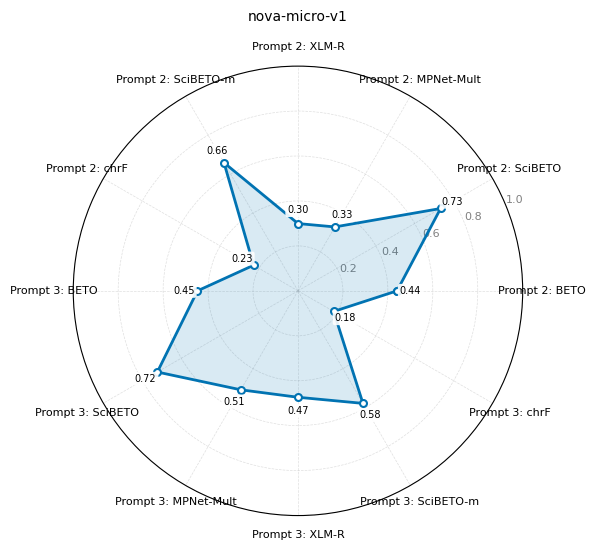

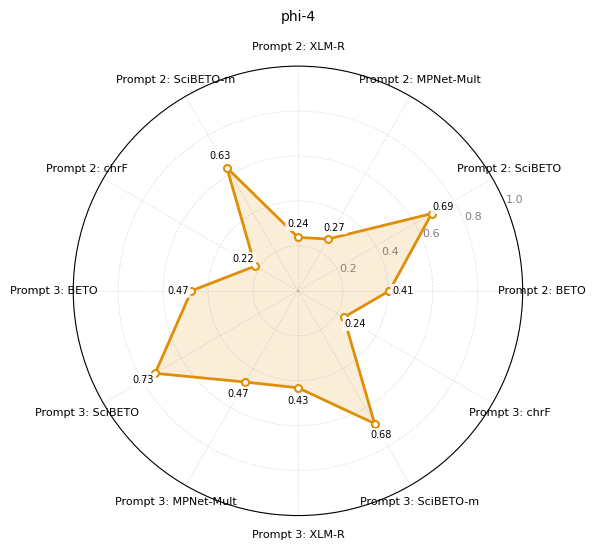

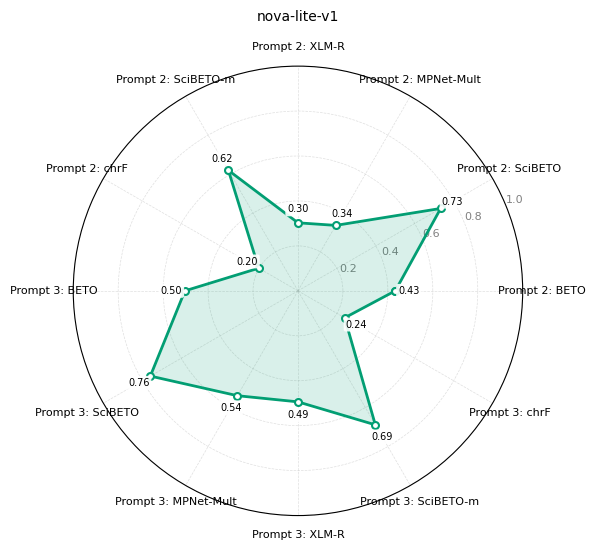

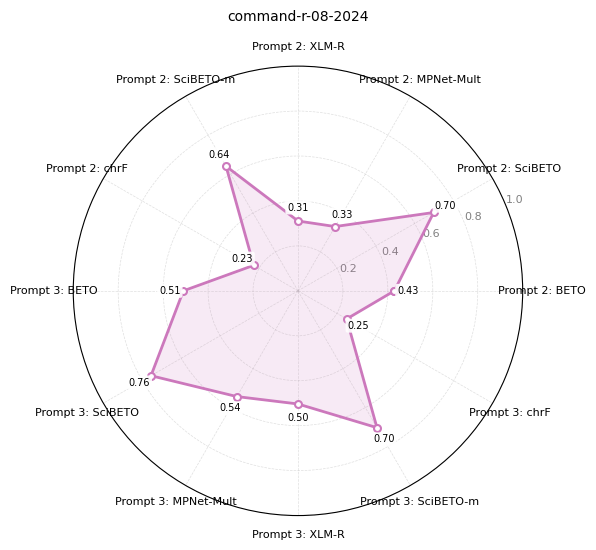

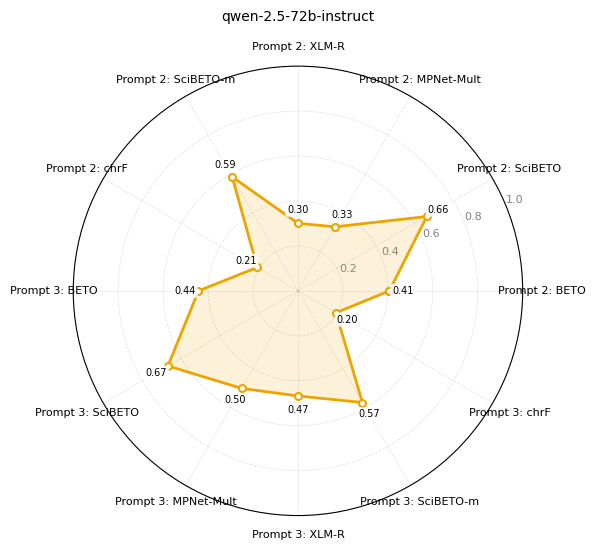

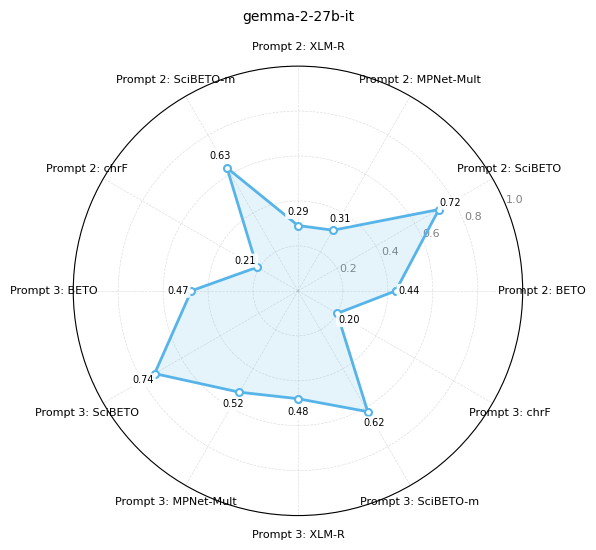

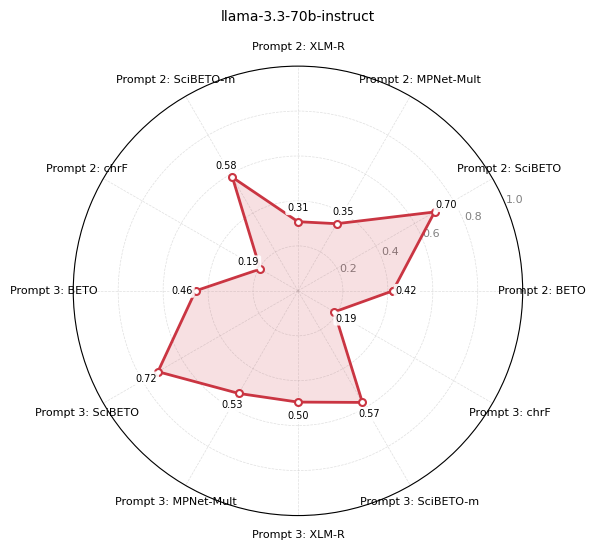

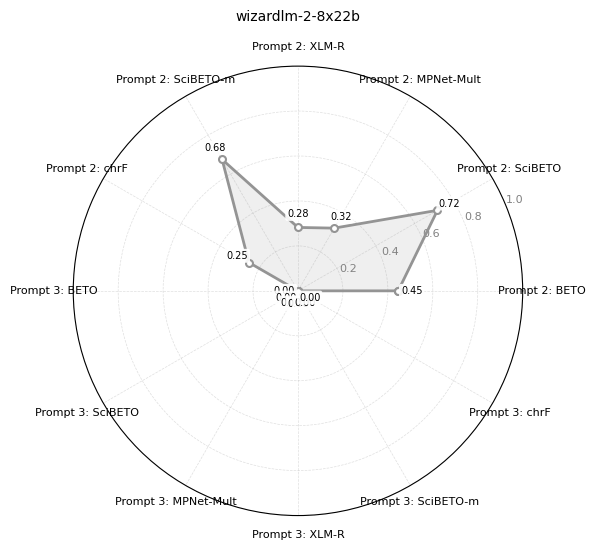

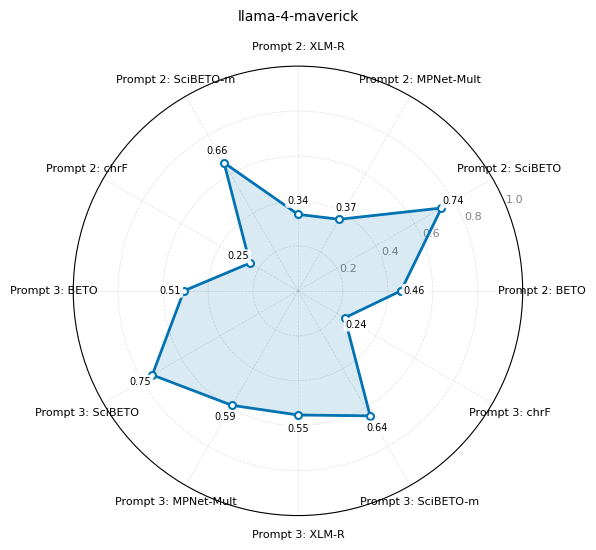

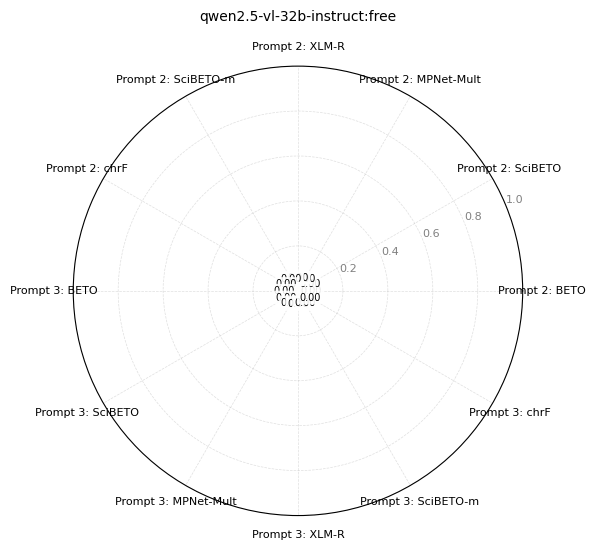

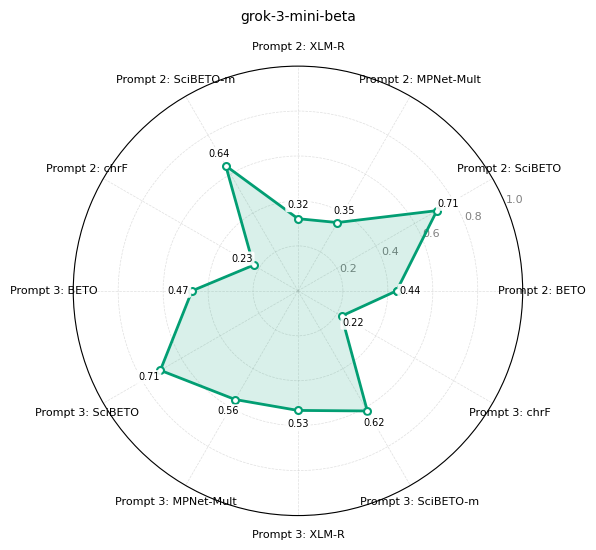

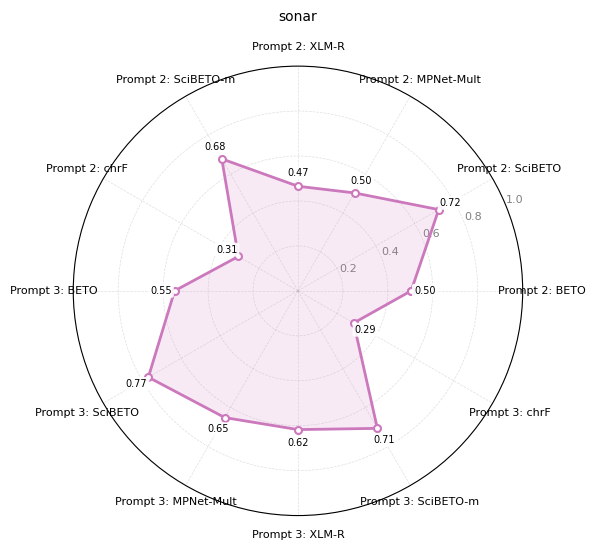

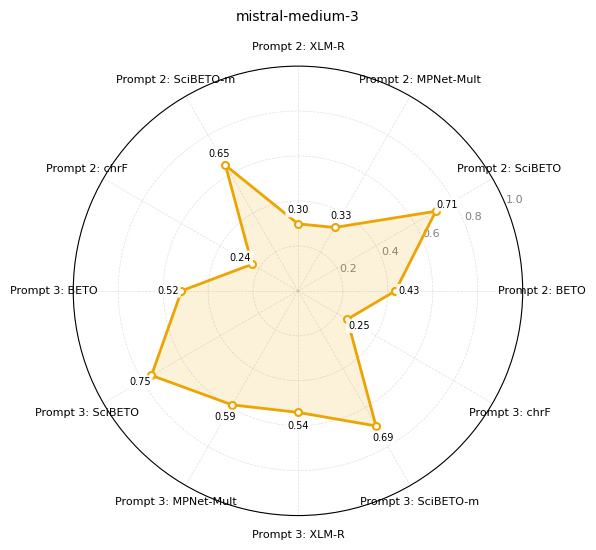

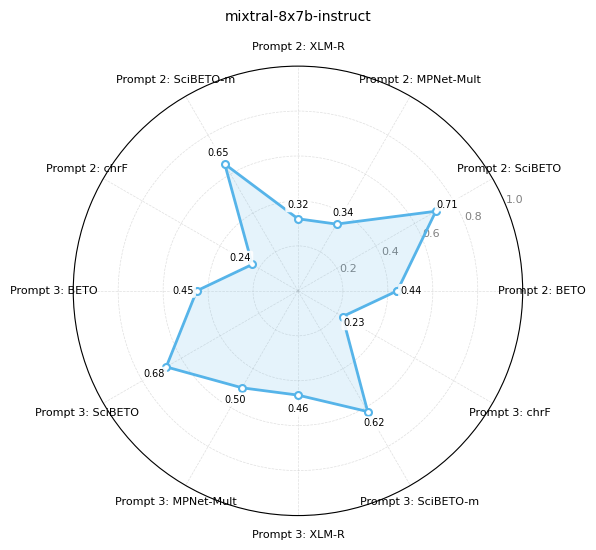

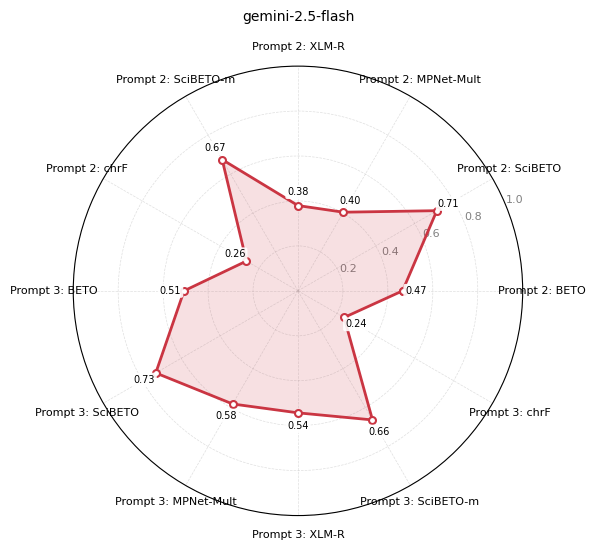

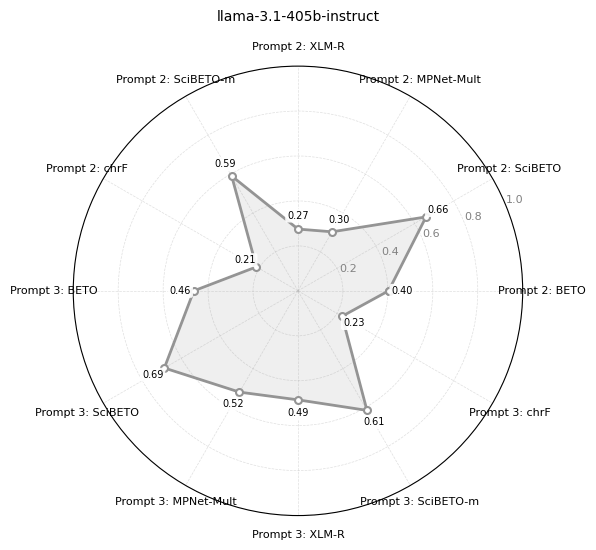

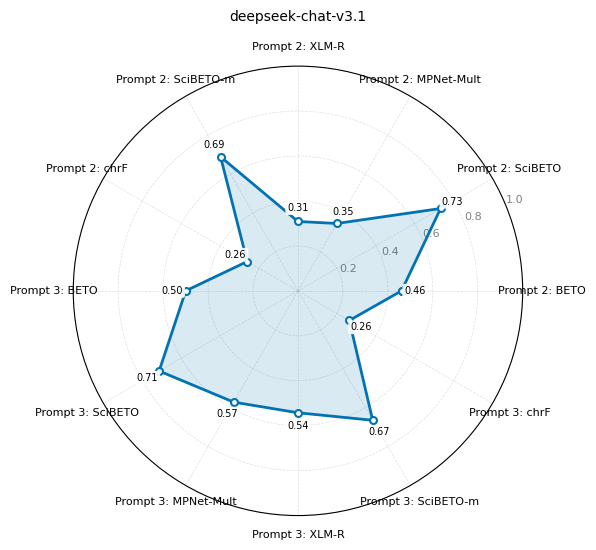

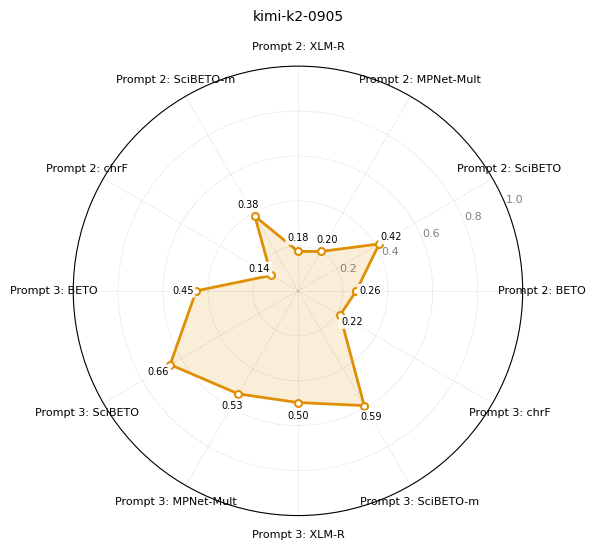

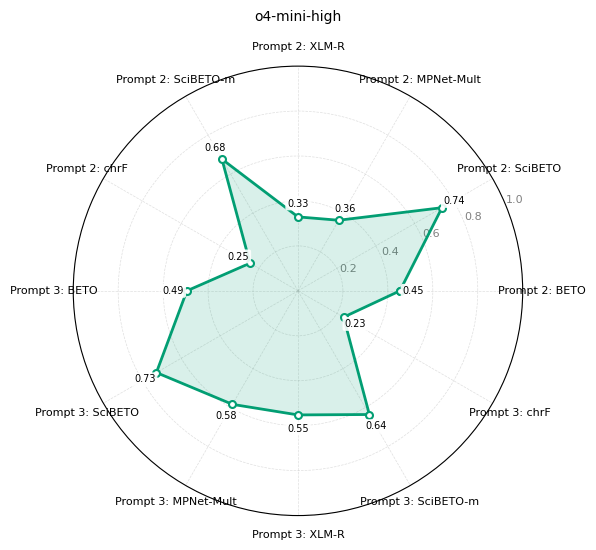

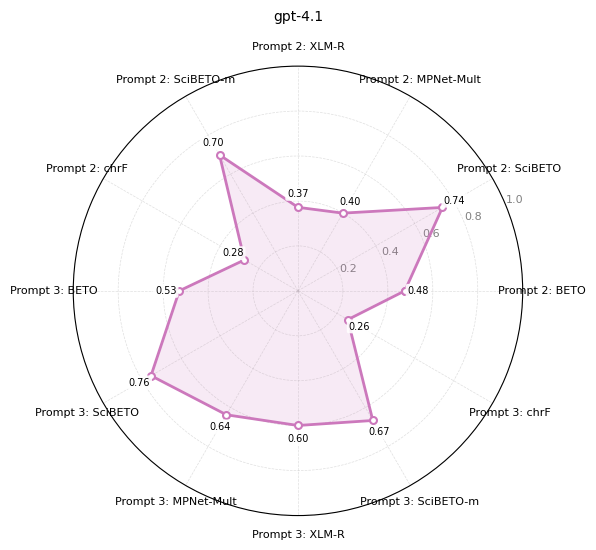

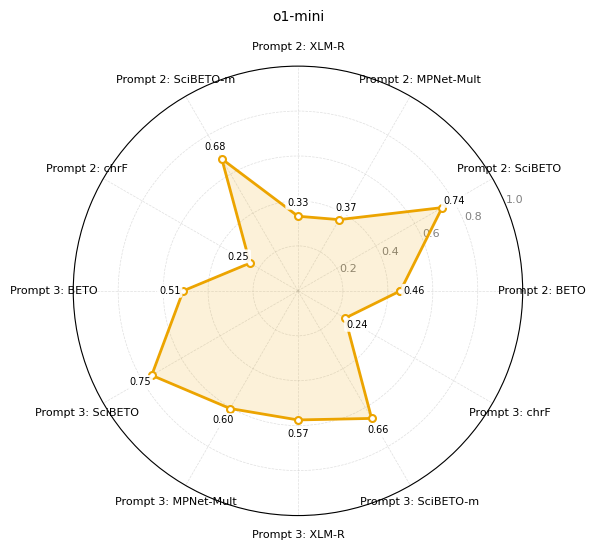

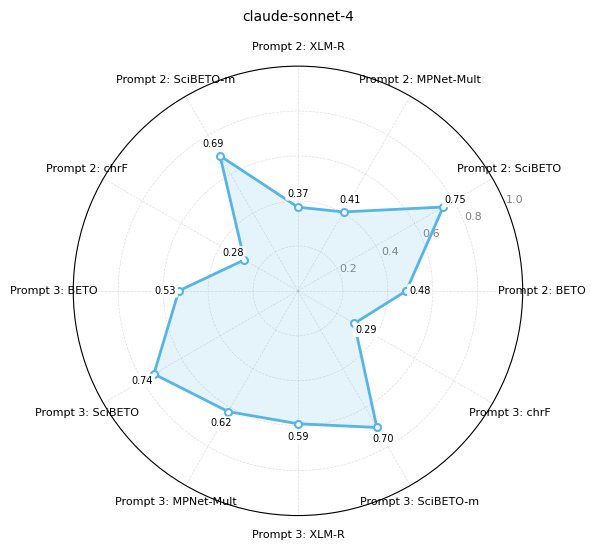

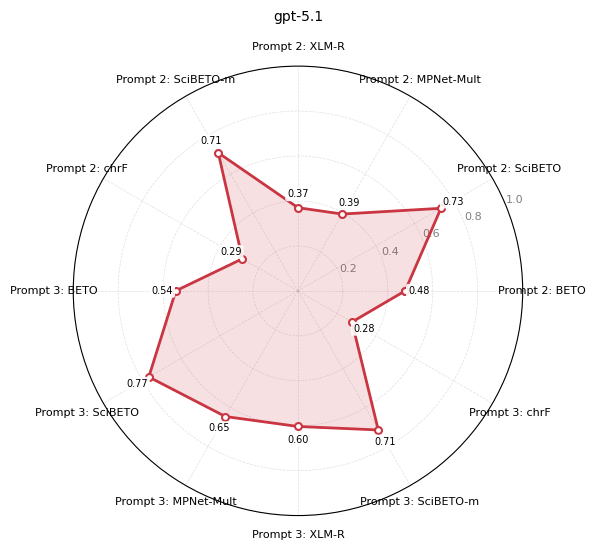

✓ Saved 23 radar plots


In [15]:
from math import pi

# Seleccionar métricas clave para el radar
radar_metrics = ['Prompt 2 (P2): BETO F1', 'Prompt 2 (P2): SciBETO F1', 'Prompt 2 (P2): MPNet-Mult', 'Prompt 2 (P2): XLM-RoBERTa', 'Prompt 2 (P2): SciBETO-mean', 'Prompt 2 (P2): chrF', 
                 'Prompt 3 (P3): BETO F1', 'Prompt 3 (P3): SciBETO F1', 'Prompt 3 (P3): MPNet-Mult', 'Prompt 3 (P3): XLM-RoBERTa', 'Prompt 3 (P3): SciBETO-mean', 'Prompt 3 (P3): chrF']
radar_labels = ['Prompt 2: BETO', 'Prompt 2: SciBETO', 'Prompt 2: MPNet-Mult', 'Prompt 2: XLM-R', 'Prompt 2: SciBETO-m', 'Prompt 2: chrF', 
                'Prompt 3: BETO', 'Prompt 3: SciBETO', 'Prompt 3: MPNet-Mult', 'Prompt 3: XLM-R', 'Prompt 3: SciBETO-m', 'Prompt 3: chrF']

# Preparar datos para radar
radar_data = {}
for modelo_short, scores in metrics_data.items():
    radar_data[modelo_short] = [scores[metric] for metric in radar_metrics]

# Número de variables
num_vars = len(radar_metrics)

# Calcular ángulos para cada eje
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Crear una figura individual para cada modelo - ACL style
for idx, (modelo_short, values) in enumerate(radar_data.items()):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))
    
    values_plot = values + values[:1]
    
    # Use ACL color palette
    color = ACL_COLOR_CYCLE[idx % len(ACL_COLOR_CYCLE)]
    
    # Dibujar línea y rellenar - simplified for ACL style
    ax.plot(angles, values_plot, 'o-', linewidth=2, 
            color=color, markersize=5, markerfacecolor='white', 
            markeredgewidth=1.5, markeredgecolor=color)
    ax.fill(angles, values_plot, alpha=0.15, color=color)
    
    # Configurar ejes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_labels)
    ax.set_ylim(0, 1)
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color='gray')
    ax.grid(True, linestyle='--', alpha=0.4)
    
    # Añadir valores en cada punto - smaller, cleaner
    for angle, value in zip(angles[:-1], values):
        ax.text(angle, value + 0.06, f'{value:.2f}', 
                ha='center', va='center', fontsize=7,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', 
                         alpha=0.9, edgecolor='none'))
    
    # Título
    ax.set_title(f'{modelo_short}', pad=15)

    plt.tight_layout()
    plt.savefig(RANKING_OUTPUT_DIR / f'radar_{modelo_short.replace("/", "_")}.pdf', 
                bbox_inches='tight', dpi=300)
    plt.show()

print(f"✓ Saved {len(radar_data)} radar plots")

## Visualización 3: Distribución de Scores por Métrica

Gráficas separadas mostrando distribución completa de cada métrica.

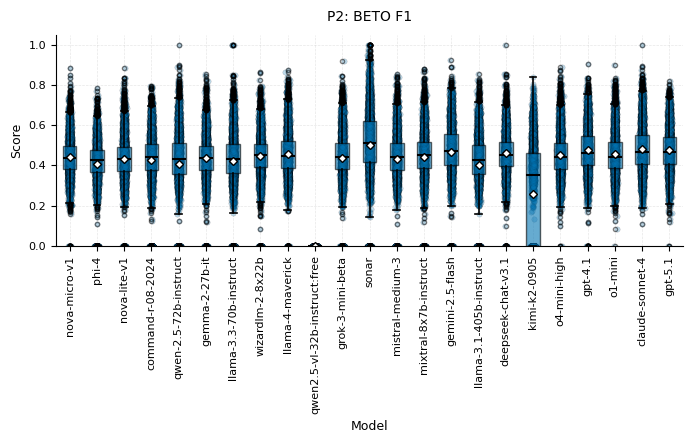

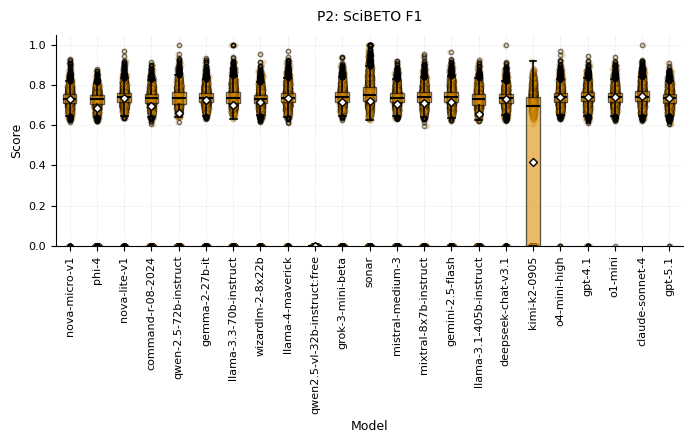

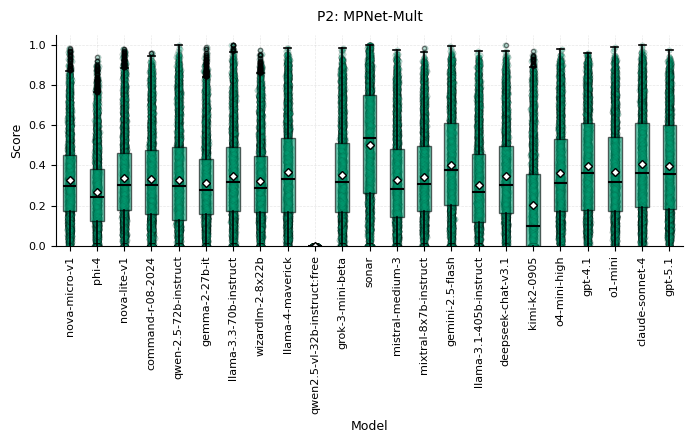

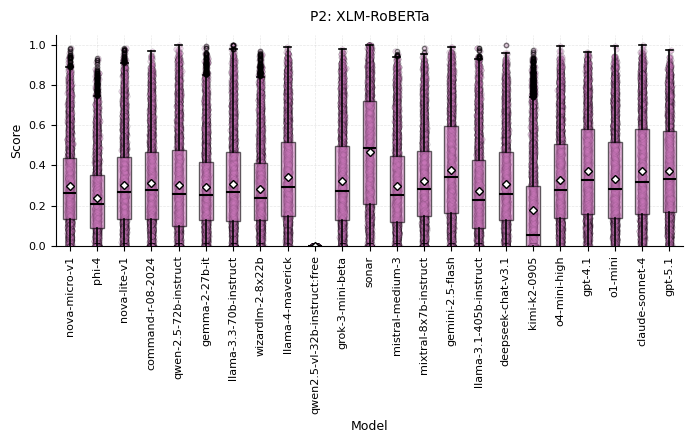

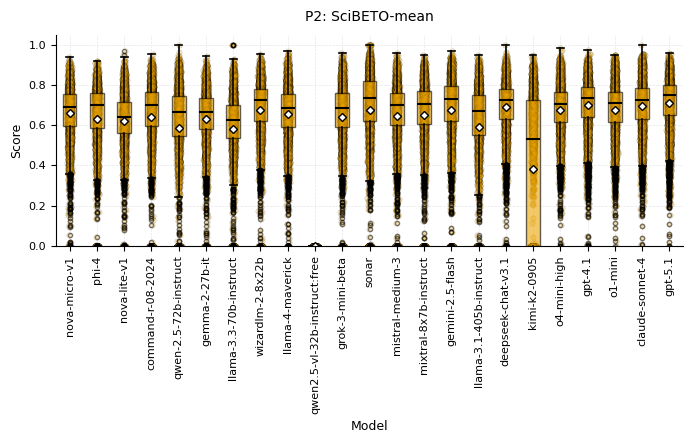

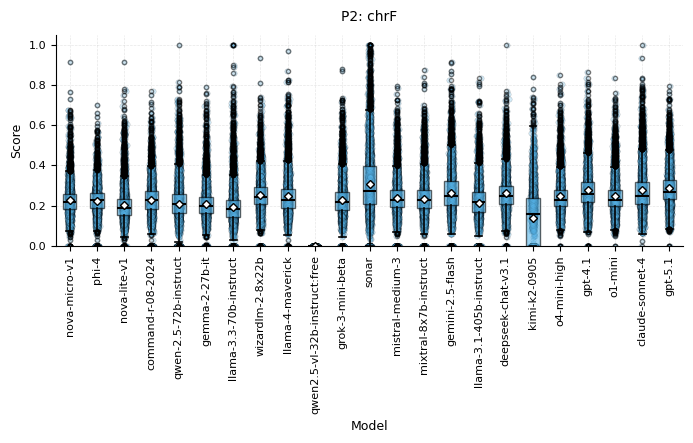

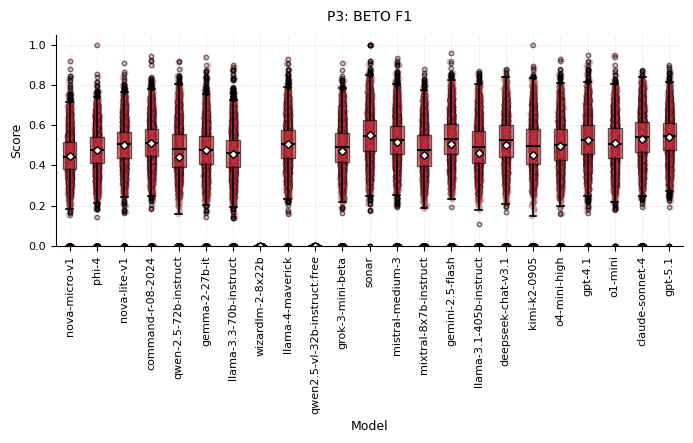

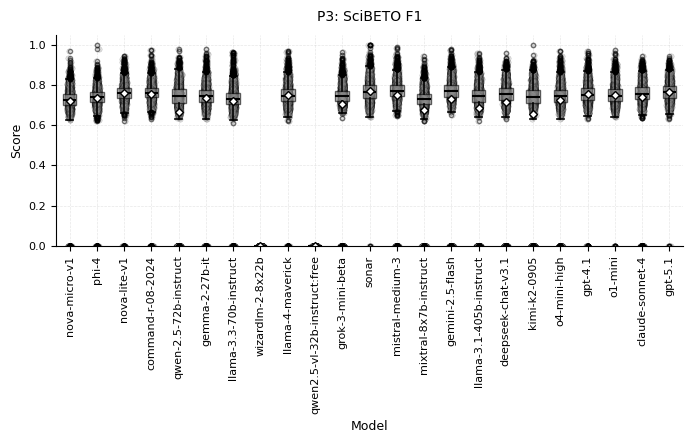

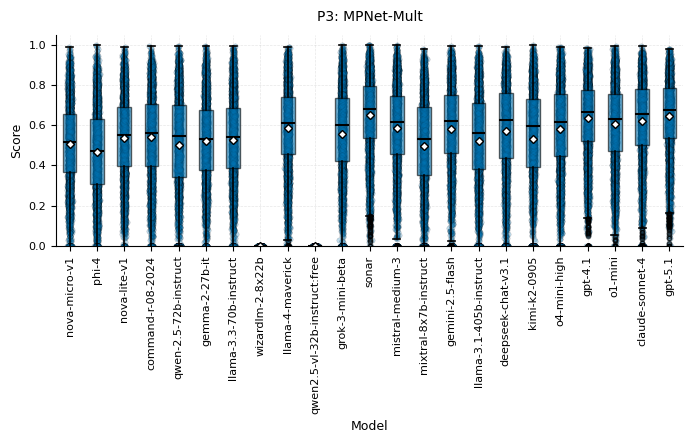

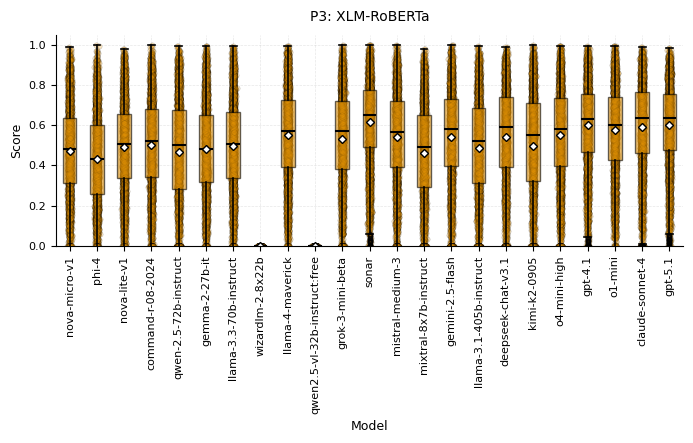

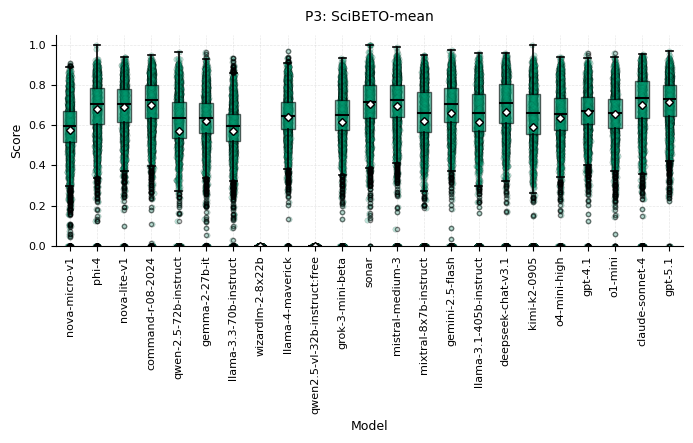

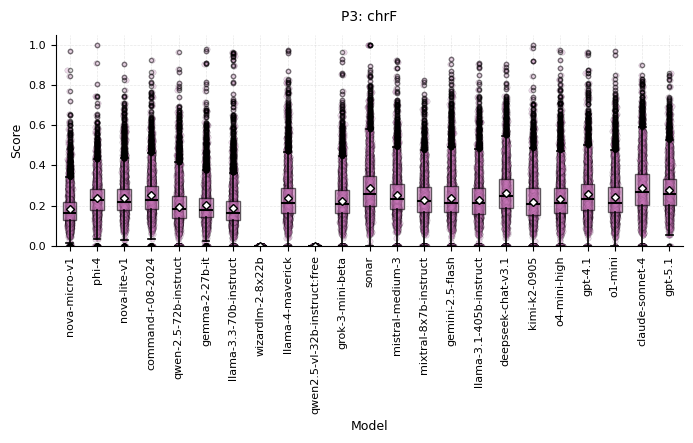

✓ Saved 12 boxplot distributions


In [16]:
# Preparar datos para boxplots
boxplot_data = []

for modelo in p2_beto['modelo'].unique():
    modelo_short = modelo.split('/')[-1]
    
    # Prompt 2
    for score in p2_beto[p2_beto['modelo'] == modelo]['f1_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: BETO F1', 'Score': score})
    for score in p2_scibeto[p2_scibeto['modelo'] == modelo]['f1_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: SciBETO F1', 'Score': score})
    for score in p2_sbert[p2_sbert['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: MPNet-Mult', 'Score': score})
    for score in p2_xlm_roberta[p2_xlm_roberta['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: XLM-RoBERTa', 'Score': score})
    for score in p2_scibeto_mean[p2_scibeto_mean['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: SciBETO-mean', 'Score': score})
    for score in p2_chrf[p2_chrf['modelo'] == modelo]['chrf_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P2: chrF', 'Score': score})
    
    # Prompt 3
    for score in p3_beto[p3_beto['modelo'] == modelo]['f1_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: BETO F1', 'Score': score})
    for score in p3_scibeto[p3_scibeto['modelo'] == modelo]['f1_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: SciBETO F1', 'Score': score})
    for score in p3_sbert[p3_sbert['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: MPNet-Mult', 'Score': score})
    for score in p3_xlm_roberta[p3_xlm_roberta['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: XLM-RoBERTa', 'Score': score})
    for score in p3_scibeto_mean[p3_scibeto_mean['modelo'] == modelo]['similarity']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: SciBETO-mean', 'Score': score})
    for score in p3_chrf[p3_chrf['modelo'] == modelo]['chrf_score']:
        boxplot_data.append({'Modelo': modelo_short, 'Métrica': 'P3: chrF', 'Score': score})

df_boxplot = pd.DataFrame(boxplot_data)

# Crear 10 gráficas separadas (una por métrica) - ACL style
metrics_to_plot = ['P2: BETO F1', 'P2: SciBETO F1', 'P2: MPNet-Mult', 'P2: XLM-RoBERTa', 'P2: SciBETO-mean', 'P2: chrF',
                   'P3: BETO F1', 'P3: SciBETO F1', 'P3: MPNet-Mult', 'P3: XLM-RoBERTa', 'P3: SciBETO-mean', 'P3: chrF']

for idx, metric in enumerate(metrics_to_plot):
    # Figure size for publication
    fig, ax = plt.subplots(figsize=(7, 4.5))
    
    metric_data = df_boxplot[df_boxplot['Métrica'] == metric]
    modelos_unicos = metric_data['Modelo'].unique()
    
    # Preparar datos para boxplot
    data_by_model = [metric_data[metric_data['Modelo'] == model]['Score'].values 
                     for model in modelos_unicos]
    
    # ACL color for this metric
    color = ACL_COLOR_CYCLE[idx % len(ACL_COLOR_CYCLE)]
    
    # Crear boxplot - ACL style (cleaner, no notches)
    bp = ax.boxplot(
        data_by_model,
        tick_labels=modelos_unicos,
        patch_artist=True,
        notch=False,  # Simpler for ACL
        showmeans=True,
        meanprops=dict(marker='D', markerfacecolor='white', 
                      markeredgecolor='black', markersize=4, markeredgewidth=1),
        medianprops=dict(color='black', linewidth=1.5),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(marker='o', markersize=3, alpha=0.5)
    )
    
    # Colorear cajas
    for patch in bp['boxes']:
        patch.set_facecolor(color)
        patch.set_alpha(0.6)
        patch.set_linewidth(1)
    
    # Agregar puntos individuales con jitter - minimal for ACL
    for i, data in enumerate(data_by_model):
        y = data
        x = np.random.normal(i+1, 0.03, size=len(y))
        ax.scatter(x, y, alpha=0.25, s=15, color=color, 
                  edgecolors='black', linewidth=0.3)
    
    ax.set_title(f'{metric}', pad=10)
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_ylim([0, 1.05])
    ax.grid(True, alpha=0.3, axis='y')
    
    # Rotate labels vertically
    plt.xticks(rotation=90, ha='center')
    
    plt.tight_layout()
    safe_name = metric.replace(":", "").replace(" ", "_")
    plt.savefig(RANKING_OUTPUT_DIR / f'boxplot_{idx+1}_{safe_name}.pdf', 
                bbox_inches='tight', dpi=300)
    plt.show()

print(f"✓ Saved {len(metrics_to_plot)} boxplot distributions")

## Visualización 4: Ranking General

Ranking basado en cuántas veces cada modelo obtuvo el primer lugar en cada métrica.

Posición                        Modelo  Score Promedio  \
0          1                         sonar          0.5549   
1          2                       gpt-5.1          0.5316   
2          3               claude-sonnet-4          0.5282   
3          4                       gpt-4.1          0.5246   
4          5              llama-4-maverick          0.5205   
5          6             command-r-08-2024          0.5081   
6          7            deepseek-chat-v3.1          0.5074   
7          8              mistral-medium-3          0.5044   
8          9                gemma-2-27b-it          0.4987   
9         10              gemini-2.5-flash          0.4965   
10        11                       o1-mini          0.4841   
11        12        llama-3.3-70b-instruct          0.4806   
12        13                  nova-lite-v1          0.4771   
13        14       llama-3.1-405b-instruct          0.4755   
14        15                  o4-mini-high          0.4748   
15        16                         phi-4          0.4648   
16        17         mixtral-8x7b-instruct          0.4598   
17        18              grok-3-mini-beta          0.4576   
18        19                 nova-micro-v1          0.4499   
19        20         qwen-2.5-72b-instruct          0.4427   
20        21                  kimi-k2-0905          0.3834   
21        22              wizardlm-2-8x22b          0.2418   
22        23  qwen2.5-vl-32b-instruct:free          0.0000   

    Top 1 (por métrica)  Top 3 (por métrica)  Prompt 2 (P2): BETO  \
0                     8                   10                0.504   
1                     2                    9                0.477   
2                     2                    8                0.482   
3                     0                    4                0.475   
4                     0                    0                0.458   
5                     0                    1                0.429   
6                     0                    0                0.461   
7                     0                    0                0.434   
8                     1                    1                0.435   
9                     0                    2                0.465   
10                    0                    1                0.456   
11                    0                    1                0.422   
12                    0                    1                0.433   
13                    0                    1                0.403   
14                    0                    0                0.454   
15                    0                    0                0.407   
16                    0                    0                0.442   
17                    0                    0                0.439   
18                    0                    0                0.441   
19                    0                    0                0.407   
20                    0                    0                0.260   
21                    0                    0                0.446   
22                    0                    0                0.000   

    Prompt 2 (P2): SciBETO  Prompt 2 (P2): MPNet-Mult  Prompt 2 (P2): XLM-R  \
0                    0.723                      0.503                 0.466   
1                    0.735                      0.395                 0.370   
2                    0.746                      0.405                 0.372   
3                    0.742                      0.399                 0.372   
4                    0.737                      0.368                 0.340   
5                    0.697                      0.330                 0.311   
6                    0.733                      0.346                 0.309   
7                    0.708                      0.326                 0.298   
8                    0.724                      0.312                 0.291   
9                    0.713                      0.404               

✓ Ranking table saved to CSV


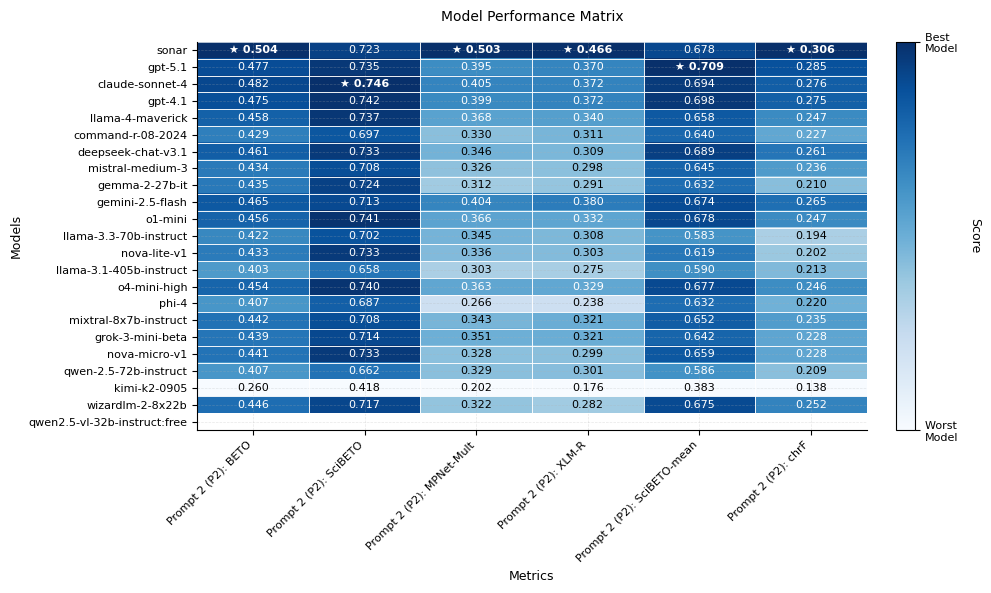

In [21]:
# Calcular ranking basado en el score promedio de todas las métricas
ranking_data = []

for modelo_short, scores in metrics_data.items():
    # Calcular promedio general
    all_scores = list(scores.values())
    avg_score = np.mean(all_scores)
    
    # Contar cuántas veces quedó en top 3 por métrica
    top_1_count = 0
    top_3_count = 0
    
    for metric_name in metric_names:
        # Obtener todos los scores para esta métrica
        metric_scores = [(m, metrics_data[m][metric_name]) for m in metrics_data.keys()]
        metric_scores_sorted = sorted(metric_scores, key=lambda x: x[1], reverse=True)
        
        # Verificar posición del modelo actual
        for pos, (m, s) in enumerate(metric_scores_sorted, 1):
            if m == modelo_short:
                if pos == 1:
                    top_1_count += 1
                if pos <= 3:
                    top_3_count += 1
                break
    
    ranking_data.append({
        'Modelo': modelo_short,
        'Score Promedio': round(avg_score, 4),
        'Top 1 (por métrica)': top_1_count,
        'Top 3 (por métrica)': top_3_count,
        'Prompt 2 (P2): BETO': round(scores['Prompt 2 (P2): BETO F1'], 3),
        'Prompt 2 (P2): SciBETO': round(scores['Prompt 2 (P2): SciBETO F1'], 3),
        'Prompt 2 (P2): MPNet-Mult': round(scores['Prompt 2 (P2): MPNet-Mult'], 3),
        'Prompt 2 (P2): XLM-R': round(scores['Prompt 2 (P2): XLM-RoBERTa'], 3),
        'Prompt 2 (P2): SciBETO-mean': round(scores['Prompt 2 (P2): SciBETO-mean'], 3),
        'Prompt 2 (P2): chrF': round(scores['Prompt 2 (P2): chrF'], 3),
        'Prompt 3 (P3): BETO': round(scores['Prompt 3 (P3): BETO F1'], 3),
        'Prompt 3 (P3): SciBETO': round(scores['Prompt 3 (P3): SciBETO F1'], 3),
        'Prompt 3 (P3): MPNet-Mult': round(scores['Prompt 3 (P3): MPNet-Mult'], 3),
        'Prompt 3 (P3): XLM-R': round(scores['Prompt 3 (P3): XLM-RoBERTa'], 3),
        'Prompt 3 (P3): SciBETO-mean': round(scores['Prompt 3 (P3): SciBETO-mean'], 3),
        'Prompt 3 (P3): chrF': round(scores['Prompt 3 (P3): chrF'], 3)
    })

# Crear DataFrame y ordenar por score promedio
ranking_df = pd.DataFrame(ranking_data)
ranking_df = ranking_df.sort_values('Score Promedio', ascending=False).reset_index(drop=True)
ranking_df['Posición'] = range(1, len(ranking_df) + 1)

# Reordenar columnas
cols = ['Posición', 'Modelo', 'Score Promedio', 'Top 1 (por métrica)', 'Top 3 (por métrica)'] + \
       [col for col in ranking_df.columns if col not in ['Posición', 'Modelo', 'Score Promedio', 'Top 1 (por métrica)', 'Top 3 (por métrica)']]
ranking_df = ranking_df[cols]

display(ranking_df)

# Guardar ranking
ranking_df.to_csv(RANKING_OUTPUT_DIR / 'ranking_general.csv', index=False, encoding='utf-8')
print(f"✓ Ranking table saved to CSV")

# ============================================================================
# ACL-STYLE HEATMAP - Performance Matrix
# ============================================================================

# Prepare data for heatmap
heatmap_df = ranking_df.set_index('Modelo')[['Prompt 2 (P2): BETO', 'Prompt 2 (P2): SciBETO', 'Prompt 2 (P2): MPNet-Mult', 
                                               'Prompt 2 (P2): XLM-R', 'Prompt 2 (P2): SciBETO-mean', 'Prompt 2 (P2): chrF']]

# Sort by average score (include ALL models)
heatmap_df = heatmap_df.loc[ranking_df.sort_values('Score Promedio', ascending=False)['Modelo']]

# Create ACL-style heatmap with column-wise normalization
fig, ax = plt.subplots(figsize=(10, 6))

# Use blue colormap (light to dark blue)
from matplotlib.colors import LinearSegmentedColormap
cmap = plt.cm.Blues

# Normalize each column independently using min-max normalization
heatmap_normalized = heatmap_df.copy()
best_per_column = {}  # Track best value per column for star annotation

for col in heatmap_normalized.columns:
    col_values = heatmap_df[col]
    # Find best (max) value for star
    best_per_column[col] = col_values.idxmax()
    
    # Get non-zero values for normalization
    non_zero_values = col_values[col_values >= 0.001]
    
    if len(non_zero_values) > 0:
        col_min = non_zero_values.min()
        col_max = non_zero_values.max()
        
        if col_max - col_min > 0:
            # Normalize using min-max range
            heatmap_normalized[col] = (heatmap_df[col] - col_min) / (col_max - col_min)
        else:
            # If all values are the same, use mid-value
            heatmap_normalized[col] = 0.5
        
        # Set blank cells to NaN
        heatmap_normalized.loc[heatmap_df[col] < 0.001, col] = np.nan
    else:
        # All values are zero
        heatmap_normalized[col] = np.nan

# Create heatmap with normalized colors (per column)
# Use white color for NaN values (blank cells)
cmap_with_nan = cmap.copy()
cmap_with_nan.set_bad(color='white')

im = ax.imshow(heatmap_normalized.values, cmap=cmap_with_nan, aspect='auto', vmin=0, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(heatmap_df.columns)))
ax.set_yticks(np.arange(len(heatmap_df.index)))
ax.set_xticklabels(heatmap_df.columns, rotation=45, ha='right')
ax.set_yticklabels(heatmap_df.index)

# Add cell borders
for i in range(len(heatmap_df.index)):
    for j in range(len(heatmap_df.columns)):
        rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, 
                            edgecolor='white', linewidth=0.5)
        ax.add_patch(rect)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Score', rotation=270, labelpad=15)
cbar.set_ticks([0.0, 1.0])
cbar.set_ticklabels(['Worst \nModel', 'Best \nModel'])

# Annotate cells with ACTUAL values (not normalized)
for i in range(len(heatmap_df.index)):
    for j in range(len(heatmap_df.columns)):
        actual_value = heatmap_df.values[i, j]
        normalized_value = heatmap_normalized.values[i, j]
        
        # Skip annotation for blank cells (values < 0.001 or NaN)
        if actual_value < 0.001 or np.isnan(normalized_value):
            continue
        
        # Determine text color based on background
        if normalized_value > 0.5:
            # White text for darker backgrounds (dark blue)
            text_color = 'white'
        else:
            # Black text for lighter backgrounds (light blue)
            text_color = 'black'
        
        # Check if this is the best value in this column
        col_name = heatmap_df.columns[j]
        row_name = heatmap_df.index[i]
        is_best = (best_per_column[col_name] == row_name)
        
        # Add star for best value
        value_text = f'{actual_value:.3f}'
        if is_best:
            value_text = f'★ {value_text}'
        
        text = ax.text(j, i, value_text,
                      ha='center', va='center', 
                      fontsize=8, color=text_color, weight='bold' if is_best else 'normal')

ax.set_title('Model Performance Matrix', pad=15)
ax.set_xlabel('Metrics')
ax.set_ylabel('Models')

plt.tight_layout()
plt.savefig(RANKING_OUTPUT_DIR / 'heatmap_performance_matrix_task2.pdf', 
            bbox_inches='tight', dpi=300)
plt.show()

Posición                        Modelo  Score Promedio  \
0          1                         sonar          0.5549   
1          2                       gpt-5.1          0.5316   
2          3               claude-sonnet-4          0.5282   
3          4                       gpt-4.1          0.5246   
4          5              llama-4-maverick          0.5205   
5          6             command-r-08-2024          0.5081   
6          7            deepseek-chat-v3.1          0.5074   
7          8              mistral-medium-3          0.5044   
8          9                gemma-2-27b-it          0.4987   
9         10              gemini-2.5-flash          0.4965   
10        11                       o1-mini          0.4841   
11        12        llama-3.3-70b-instruct          0.4806   
12        13                  nova-lite-v1          0.4771   
13        14       llama-3.1-405b-instruct          0.4755   
14        15                  o4-mini-high          0.4748   
15        16                         phi-4          0.4648   
16        17         mixtral-8x7b-instruct          0.4598   
17        18              grok-3-mini-beta          0.4576   
18        19                 nova-micro-v1          0.4499   
19        20         qwen-2.5-72b-instruct          0.4427   
20        21                  kimi-k2-0905          0.3834   
21        22              wizardlm-2-8x22b          0.2418   
22        23  qwen2.5-vl-32b-instruct:free          0.0000   

    Top 1 (por métrica)  Top 3 (por métrica)  Prompt 2 (P2): BETO  \
0                     8                   10                0.504   
1                     2                    9                0.477   
2                     2                    8                0.482   
3                     0                    4                0.475   
4                     0                    0                0.458   
5                     0                    1                0.429   
6                     0                    0                0.461   
7                     0                    0                0.434   
8                     1                    1                0.435   
9                     0                    2                0.465   
10                    0                    1                0.456   
11                    0                    1                0.422   
12                    0                    1                0.433   
13                    0                    1                0.403   
14                    0                    0                0.454   
15                    0                    0                0.407   
16                    0                    0                0.442   
17                    0                    0                0.439   
18                    0                    0                0.441   
19                    0                    0                0.407   
20                    0                    0                0.260   
21                    0                    0                0.446   
22                    0                    0                0.000   

    Prompt 2 (P2): SciBETO  Prompt 2 (P2): MPNet-Mult  Prompt 2 (P2): XLM-R  \
0                    0.723                      0.503                 0.466   
1                    0.735                      0.395                 0.370   
2                    0.746                      0.405                 0.372   
3                    0.742                      0.399                 0.372   
4                    0.737                      0.368                 0.340   
5                    0.697                      0.330                 0.311   
6                    0.733                      0.346                 0.309   
7                    0.708                      0.326                 0.298   
8                    0.724                      0.312                 0.291   
9                    0.713                      0.404               

✓ Ranking table saved to CSV


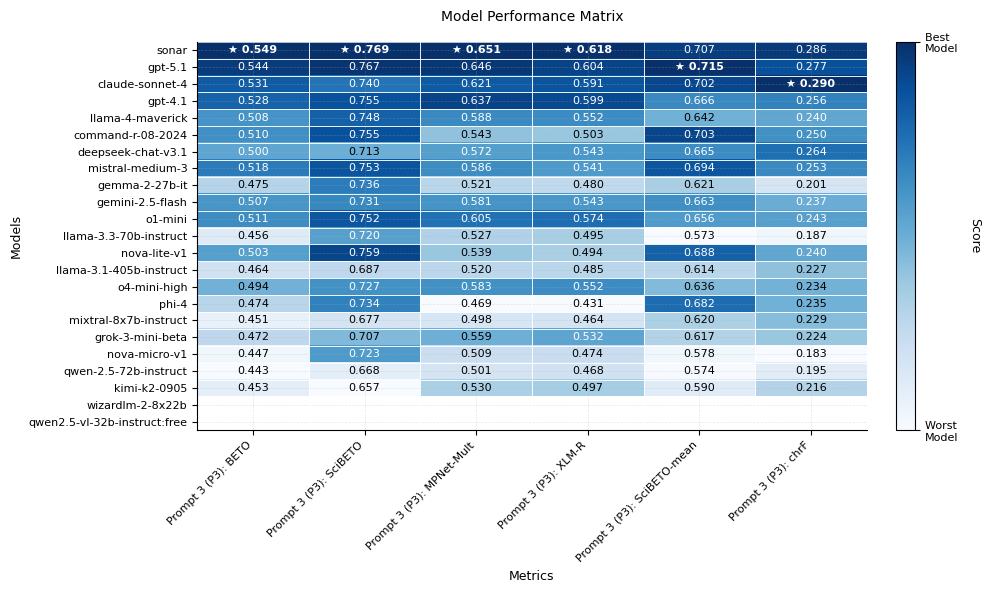

In [22]:
# Calcular ranking basado en el score promedio de todas las métricas
ranking_data = []

for modelo_short, scores in metrics_data.items():
    # Calcular promedio general
    all_scores = list(scores.values())
    avg_score = np.mean(all_scores)
    
    # Contar cuántas veces quedó en top 3 por métrica
    top_1_count = 0
    top_3_count = 0
    
    for metric_name in metric_names:
        # Obtener todos los scores para esta métrica
        metric_scores = [(m, metrics_data[m][metric_name]) for m in metrics_data.keys()]
        metric_scores_sorted = sorted(metric_scores, key=lambda x: x[1], reverse=True)
        
        # Verificar posición del modelo actual
        for pos, (m, s) in enumerate(metric_scores_sorted, 1):
            if m == modelo_short:
                if pos == 1:
                    top_1_count += 1
                if pos <= 3:
                    top_3_count += 1
                break
    
    ranking_data.append({
        'Modelo': modelo_short,
        'Score Promedio': round(avg_score, 4),
        'Top 1 (por métrica)': top_1_count,
        'Top 3 (por métrica)': top_3_count,
        'Prompt 2 (P2): BETO': round(scores['Prompt 2 (P2): BETO F1'], 3),
        'Prompt 2 (P2): SciBETO': round(scores['Prompt 2 (P2): SciBETO F1'], 3),
        'Prompt 2 (P2): MPNet-Mult': round(scores['Prompt 2 (P2): MPNet-Mult'], 3),
        'Prompt 2 (P2): XLM-R': round(scores['Prompt 2 (P2): XLM-RoBERTa'], 3),
        'Prompt 2 (P2): SciBETO-mean': round(scores['Prompt 2 (P2): SciBETO-mean'], 3),
        'Prompt 2 (P2): chrF': round(scores['Prompt 2 (P2): chrF'], 3),
        'Prompt 3 (P3): BETO': round(scores['Prompt 3 (P3): BETO F1'], 3),
        'Prompt 3 (P3): SciBETO': round(scores['Prompt 3 (P3): SciBETO F1'], 3),
        'Prompt 3 (P3): MPNet-Mult': round(scores['Prompt 3 (P3): MPNet-Mult'], 3),
        'Prompt 3 (P3): XLM-R': round(scores['Prompt 3 (P3): XLM-RoBERTa'], 3),
        'Prompt 3 (P3): SciBETO-mean': round(scores['Prompt 3 (P3): SciBETO-mean'], 3),
        'Prompt 3 (P3): chrF': round(scores['Prompt 3 (P3): chrF'], 3)
    })

# Crear DataFrame y ordenar por score promedio
ranking_df = pd.DataFrame(ranking_data)
ranking_df = ranking_df.sort_values('Score Promedio', ascending=False).reset_index(drop=True)
ranking_df['Posición'] = range(1, len(ranking_df) + 1)

# Reordenar columnas
cols = ['Posición', 'Modelo', 'Score Promedio', 'Top 1 (por métrica)', 'Top 3 (por métrica)'] + \
       [col for col in ranking_df.columns if col not in ['Posición', 'Modelo', 'Score Promedio', 'Top 1 (por métrica)', 'Top 3 (por métrica)']]
ranking_df = ranking_df[cols]

display(ranking_df)

# Guardar ranking
ranking_df.to_csv(RANKING_OUTPUT_DIR / 'ranking_general.csv', index=False, encoding='utf-8')
print(f"✓ Ranking table saved to CSV")

# ============================================================================
# ACL-STYLE HEATMAP - Performance Matrix
# ============================================================================

# Prepare data for heatmap
heatmap_df = ranking_df.set_index('Modelo')[['Prompt 3 (P3): BETO', 'Prompt 3 (P3): SciBETO', 
                                            'Prompt 3 (P3): MPNet-Mult', 'Prompt 3 (P3): XLM-R', 'Prompt 3 (P3): SciBETO-mean', 'Prompt 3 (P3): chrF']]

# Sort by average score (include ALL models)
heatmap_df = heatmap_df.loc[ranking_df.sort_values('Score Promedio', ascending=False)['Modelo']]

# Create ACL-style heatmap with column-wise normalization
fig, ax = plt.subplots(figsize=(10, 6))

# Use blue colormap (light to dark blue)
from matplotlib.colors import LinearSegmentedColormap
cmap = plt.cm.Blues

# Normalize each column independently using min-max normalization
heatmap_normalized = heatmap_df.copy()
best_per_column = {}  # Track best value per column for star annotation

for col in heatmap_normalized.columns:
    col_values = heatmap_df[col]
    # Find best (max) value for star
    best_per_column[col] = col_values.idxmax()
    
    # Get non-zero values for normalization
    non_zero_values = col_values[col_values >= 0.001]
    
    if len(non_zero_values) > 0:
        col_min = non_zero_values.min()
        col_max = non_zero_values.max()
        
        if col_max - col_min > 0:
            # Normalize using min-max range
            heatmap_normalized[col] = (heatmap_df[col] - col_min) / (col_max - col_min)
        else:
            # If all values are the same, use mid-value
            heatmap_normalized[col] = 0.5
        
        # Set blank cells to NaN
        heatmap_normalized.loc[heatmap_df[col] < 0.001, col] = np.nan
    else:
        # All values are zero
        heatmap_normalized[col] = np.nan

# Create heatmap with normalized colors (per column)
# Use white color for NaN values (blank cells)
cmap_with_nan = cmap.copy()
cmap_with_nan.set_bad(color='white')

im = ax.imshow(heatmap_normalized.values, cmap=cmap_with_nan, aspect='auto', vmin=0, vmax=1)

# Set ticks and labels
ax.set_xticks(np.arange(len(heatmap_df.columns)))
ax.set_yticks(np.arange(len(heatmap_df.index)))
ax.set_xticklabels(heatmap_df.columns, rotation=45, ha='right')
ax.set_yticklabels(heatmap_df.index)

# Add cell borders
for i in range(len(heatmap_df.index)):
    for j in range(len(heatmap_df.columns)):
        rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=False, 
                            edgecolor='white', linewidth=0.5)
        ax.add_patch(rect)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Score', rotation=270, labelpad=15)
cbar.set_ticks([0.0, 1.0])
cbar.set_ticklabels(['Worst \nModel', 'Best \nModel'])

# Annotate cells with ACTUAL values (not normalized)
for i in range(len(heatmap_df.index)):
    for j in range(len(heatmap_df.columns)):
        actual_value = heatmap_df.values[i, j]
        normalized_value = heatmap_normalized.values[i, j]
        
        # Skip annotation for blank cells (values < 0.001 or NaN)
        if actual_value < 0.001 or np.isnan(normalized_value):
            continue
        
        # Determine text color based on background
        if normalized_value > 0.5:
            # White text for darker backgrounds (dark blue)
            text_color = 'white'
        else:
            # Black text for lighter backgrounds (light blue)
            text_color = 'black'
        
        # Check if this is the best value in this column
        col_name = heatmap_df.columns[j]
        row_name = heatmap_df.index[i]
        is_best = (best_per_column[col_name] == row_name)
        
        # Add star for best value
        value_text = f'{actual_value:.3f}'
        if is_best:
            value_text = f'★ {value_text}'
        
        text = ax.text(j, i, value_text,
                      ha='center', va='center', 
                      fontsize=8, color=text_color, weight='bold' if is_best else 'normal')

ax.set_title('Model Performance Matrix', pad=15)
ax.set_xlabel('Metrics')
ax.set_ylabel('Models')

plt.tight_layout()
plt.savefig(RANKING_OUTPUT_DIR / 'heatmap_performance_matrix_task3.pdf', 
            bbox_inches='tight', dpi=300)
plt.show()

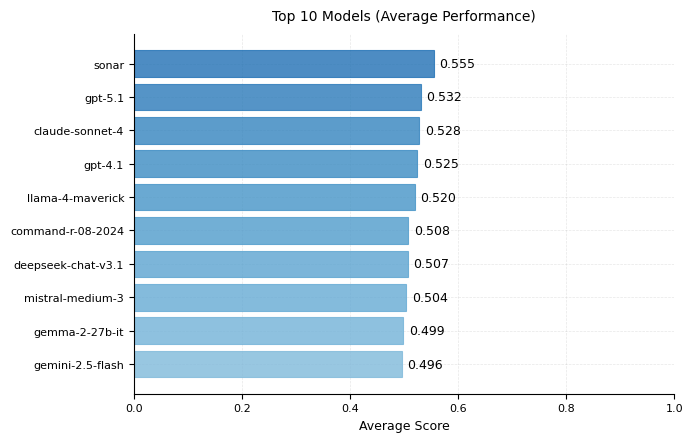

In [19]:
# ============================================================================
# ACL-STYLE OVERALL RANKING VISUALIZATION
# Compact figure suitable for publication
# ============================================================================

fig, ax1 = plt.subplots(1, 1, figsize=(7, 4.5))

# Left panel: Overall ranking by average score - ACL style
top_models = ranking_df.nlargest(10, 'Score Promedio')
y_pos = np.arange(len(top_models))

bars = ax1.barh(y_pos, top_models['Score Promedio'], 
                color=ACL_COLORS['blue'], alpha=0.8, 
                edgecolor='black', linewidth=0.8)

# Gradient coloring: best is darker
colors_gradient = plt.cm.Blues(np.linspace(0.75, 0.45, len(top_models)))
for bar, color in zip(bars, colors_gradient):
    bar.set_color(color)

ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_models['Modelo'])
ax1.invert_yaxis()
ax1.set_xlabel('Average Score')
ax1.set_title('Top 10 Models (Average Performance)', pad=10)
ax1.set_xlim(0, 1)
ax1.grid(True, alpha=0.3, axis='x', linestyle='--')

# Add score labels - ACL style
for i, (idx, row) in enumerate(top_models.iterrows()):
    ax1.text(row['Score Promedio'] + 0.01, i, f"{row['Score Promedio']:.3f}",
            va='center', ha='left')

plt.tight_layout()
plt.savefig(RANKING_OUTPUT_DIR / 'overall_ranking_summary.pdf', 
            bbox_inches='tight', dpi=300)
plt.show()


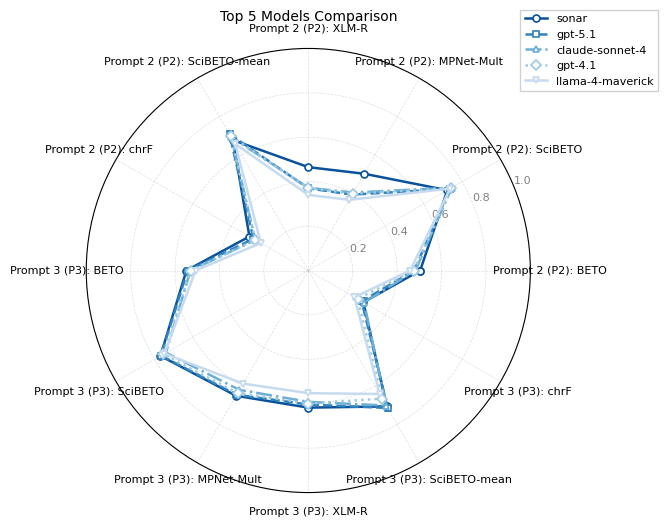

✓ Saved top-5 radar comparison


In [20]:
from math import pi

radar_metrics = ['Prompt 2 (P2): BETO F1', 'Prompt 2 (P2): SciBETO F1', 'Prompt 2 (P2): MPNet-Mult', 'Prompt 2 (P2): XLM-RoBERTa', 'Prompt 2 (P2): SciBETO-mean', 'Prompt 2 (P2): chrF', 
                 'Prompt 3 (P3): BETO F1', 'Prompt 3 (P3): SciBETO F1', 'Prompt 3 (P3): MPNet-Mult', 'Prompt 3 (P3): XLM-RoBERTa', 'Prompt 3 (P3): SciBETO-mean', 'Prompt 3 (P3): chrF']
radar_labels = ['Prompt 2 (P2): BETO', 'Prompt 2 (P2): SciBETO', 'Prompt 2 (P2): MPNet-Mult', 'Prompt 2 (P2): XLM-R', 'Prompt 2 (P2): SciBETO-mean', 'Prompt 2 (P2): chrF', 
                'Prompt 3 (P3): BETO', 'Prompt 3 (P3): SciBETO', 'Prompt 3 (P3): MPNet-Mult', 'Prompt 3 (P3): XLM-R', 'Prompt 3 (P3): SciBETO-mean', 'Prompt 3 (P3): chrF']

radar_data = {
    modelo_short: [scores[m] for m in radar_metrics]
    for modelo_short, scores in metrics_data.items()
}

num_vars = len(radar_metrics)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

top_n = 5

# Orden basado en el promedio general de todas las métricas
best_models = sorted(
    metrics_data.items(),
    key=lambda x: np.mean(list(x[1].values())),
    reverse=True
)[:top_n]

radar_top = {
    modelo: [scores[m] for m in radar_metrics]
    for modelo, scores in best_models
}

# ACL-style radar comparison - top N models
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(projection='polar'))

# Use distinct line styles for better grayscale distinction
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'v']

# Blue scale: best model is darkest, subsequent models are lighter
blue_scale = ['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef']

for idx, (modelo_short, values) in enumerate(radar_top.items()):
    values_plot = values + values[:1]
    
    color = blue_scale[idx % len(blue_scale)]
    
    ax.plot(
        angles, values_plot,
        linewidth=1.8,
        linestyle=line_styles[idx % len(line_styles)],
        marker=markers[idx % len(markers)],
        markersize=5,
        color=color,
        label=modelo_short,
        markerfacecolor='white',
        markeredgewidth=1.2,
        markeredgecolor=color
    )

ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_labels)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], color='gray')
ax.grid(True, linestyle='--', alpha=0.4)

ax.set_title(f"Top {top_n} Models Comparison", pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), framealpha=0.9)

plt.tight_layout()
plt.savefig(RANKING_OUTPUT_DIR / f'radar_top{top_n}_comparison.pdf', 
            bbox_inches='tight', dpi=300)
plt.show()

print(f"✓ Saved top-{top_n} radar comparison")